In [1]:
%load_ext autoreload
%autoreload 2
from twop.getTrack2POutput import *
from vip_helpers import *

vip_data = load_vip_data()
days = list(vip_data['day'])
#days = [day for day in days if day != 'p12']
animal = 'Back_left'
basepath = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}'
dataclasses, state_dfs, s2p_outs, recording_days = load_animal_data(animal)
track2p_path = os.path.join(basepath, 'track2p')
t2p = Track2POutput(track2p_path)
long_cells_dict = t2p.get_longitudinal_cells_dict(s2p_outs=s2p_outs, num_days_required=4)
print(f'Found {len(long_cells_dict)} tracked cells')

Shape of match matrix for cells present: (402, 4) (cells, days)
Found 1 tracked cells


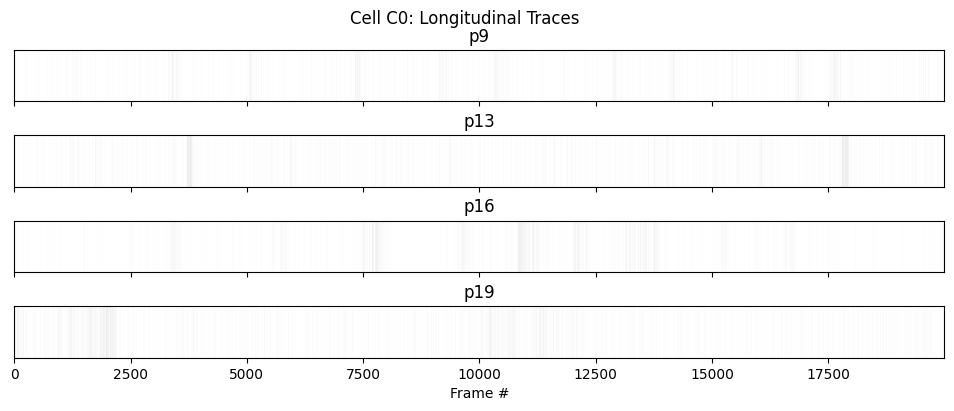

In [2]:
from twop.plots import *

for cell in list(long_cells_dict.keys()):
    rec_days = list(long_cells_dict[cell].keys())
    c0_traces = [trace for trace in long_cells_dict[cell].values()]
    c0_trace = restrict_traces(c0_traces)
    fig, axs = plt.subplots(len(rec_days), 1, figsize=(12, 4), sharex=True)
    plt.subplots_adjust(hspace=0.65)
    plt.suptitle(f'Cell {cell}: Longitudinal Traces')
    plt.xlabel('Frame #')
    for trace_idx, trace in enumerate(c0_trace):
        day_trace_2d = c0_trace[trace_idx].reshape(1, -1)
        axs[trace_idx].imshow(day_trace_2d, cmap='binary', aspect='auto') # For a single row
        axs[trace_idx].set_title(rec_days[trace_idx])
        axs[trace_idx].set_yticks([])
        #axs[trace_idx].set_colorbar(label='Value')
    #     spike_raster(c0_trace, rec_days[trace_idx])1d array
    # plt.savefig(f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/vip_figures/{animal}/{cell}_daytraces.png')
    plt.savefig(f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/vip_figures/Longitudinal/{animal}/{cell}_daytraces.png')

In [4]:
%load_ext autoreload
%autoreload 2
days = [day for day in days if day != 'p12']
t2p = Track2POutput(track2p_path)
long_cells_dict = t2p.get_longitudinal_cells_dict(s2p_outs=s2p_outs, days=days, num_days_required=2)
t2p.plot_longitudinal_traces(long_cells_dict)

Shape of match matrix for cells present: (898, 8) (cells, days)


TypeError: where() got an unexpected keyword argument 'axis'

In [ ]:
# imports
import os
from types import SimpleNamespace
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from vip_helpers import *

animal = 'Back_right'
# this is the directory that contains a /track2p folder that is output by running the track2p algorithm
t2p_save_path = f'/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/{animal}' # (change this based on your data)
plane = 'plane0' # which plane to process (the example dataset is single-plane)
# np.load() the match matrix (plane0_match_mat.npy)
t2p_match_mat = np.load(os.path.join(t2p_save_path, 'track2p', f'{plane}_match_mat.npy'), allow_pickle=True)
#s2p_indices = np.load(os.path.join(t2p_save_path, 'plane0_suite2p_indices.npy'), allow_pickle=True)
# np.load() settings (this contains suite2p paths etc.) (track_ops.npy)
track_ops_dict = np.load(os.path.join(t2p_save_path, 'track2p', 'track_ops.npy'), allow_pickle=True).item()
t2p_match_3days = t2p_match_mat[np.sum(t2p_match_mat != None, axis=1) >= 3]
print(f'Shape of match matrix for cells present for 3 days: {t2p_match_3days.shape} (cells, days)')
vip_data = load_vip_data()
days = list(vip_data['day'])

Datasets used for t2p:

/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p9
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p10
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p12
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p13
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p14
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p15
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p16
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p17
/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p19
We will look at the dataset saved at: /mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p19


In [ ]:
# def get_longitudinal_cells_dict(match_matrix, s2p_outs, num_days_required=3):
#     match_matrix = match_matrix[np.sum(match_matrix != None, axis=1) >= num_days_required]
#     curr_cell = 0
#     tracked_cells_dict = {}
#     for row_idx in range(len(match_matrix)):
#         tracked_cell = match_matrix[row_idx, :]
#         for day_idx in np.where(match_matrix[0] != None)[0]:
#             cell_on_day = tracked_cell[day_idx]
#             spike_train_day = s2p_outs[day_idx].spks[cell_on_day]
#             p_day = days[day_idx]
#             if f'C{curr_cell}' not in tracked_cells_dict.keys():
#                 tracked_cells_dict[f'C{curr_cell}'] = {p_day:spike_train_day}
#             else:
#                 tracked_cells_dict[f'C{curr_cell}'][p_day] = spike_train_day
#         curr_cell += 1
#     return tracked_cells_dict

# def plot_longitudinal_traces(tracked_cells_dict, colors = ["#00CCFF", "#2B70D6", "#090DEB", "#3102DA", "#480FE2"]):
#     cell_idx = 0
#     fig, axs = plt.subplots(len(list(tracked_cells_dict.values())[0]), len(tracked_cells_dict), figsize=(50,10))
#     for cell, traces in tracked_cells_dict.items():
#         #fig, axs = plt.subplots(len(traces), len(tracked_cells_dict), figsize=(60,10))
#         trace_idx = 0
#         axs.flat[cell_idx].set_title(cell)
#         for trace_day, trace in traces.items():
#             axs[trace_idx, cell_idx].plot(trace, color=colors[trace_idx])
#             axs[trace_idx, cell_idx].set_title(trace_day, fontsize=12, fontweight='bold')
#             trace_idx += 1
#         cell_idx += 1

from twop.getTrack2POutput



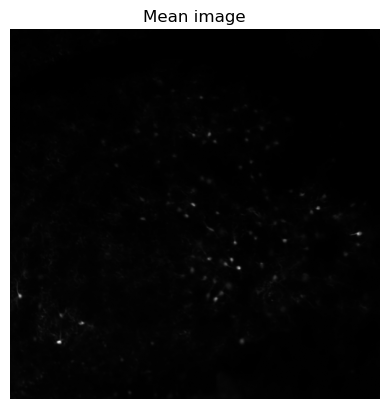

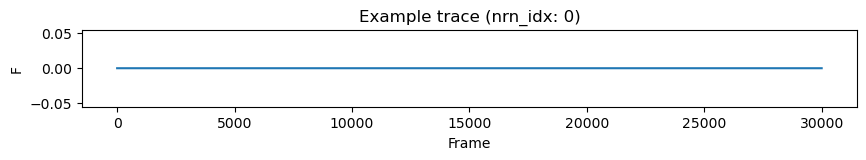

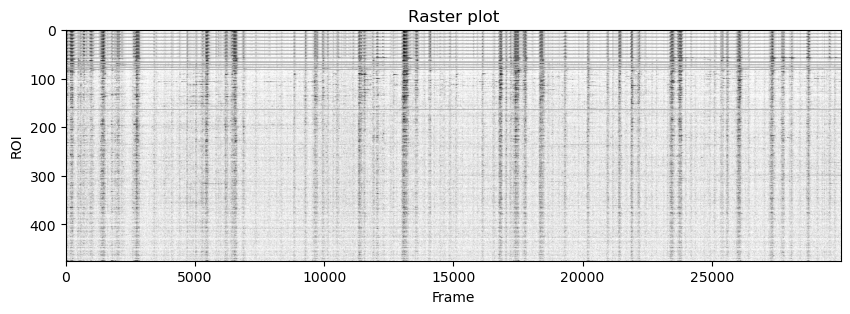

In [10]:
# now first plot the mean image of the movie (it is saved in ops.npy, for more info see the suite2p outputs documentation)
plt.imshow(last_ops['meanImg'], cmap='gray')
plt.axis('off')
plt.title('Mean image')
plt.show()

plt.figure(figsize=(10, 1))
nonmatch_nrn_idx = 0
plt.plot(last_f[nonmatch_nrn_idx, :])
plt.xlabel('Frame')
plt.ylabel('F')
plt.title(f'Example trace (nrn_idx: {nonmatch_nrn_idx})')
plt.show()

plt.figure(figsize=(10, 3))
plt.imshow(zscore(last_f_iscell, axis=1), aspect='auto', cmap='Greys', vmin=0, vmax=1.96)
plt.xlabel('Frame')
plt.ylabel('ROI')
plt.title('Raster plot')
plt.show()

In [ ]:
iscell_thr = track_ops.iscell_thr # use the same threshold as when running the algo (to be consistent with indexing)

all_stat_t2p = []
all_f_t2p = []
all_ops = [] # ops dont change

for (i, ds_path) in enumerate(track_ops.all_ds_path):
    ops = np.load(os.path.join(ds_path, 'suite2p', plane, 'ops.npy'), allow_pickle=True).item()
    stat = np.load(os.path.join(ds_path, 'suite2p', plane, 'stat.npy'), allow_pickle=True)
    f = np.load(os.path.join(ds_path, 'suite2p', plane, 'F.npy'), allow_pickle=True)
    iscell = np.load(os.path.join(ds_path, 'suite2p', plane, 'iscell.npy'), allow_pickle=True)
    
    
    if track_ops.iscell_thr==None:
        stat_iscell = stat[iscell[:, 0] == 1]
        f_iscell = f[iscell[:, 0] == 1, :]

    else:
        stat_iscell = stat[iscell[:, 1] > iscell_thr]
        f_iscell = f[iscell[:, 1] > iscell_thr, :]
    
    
    stat_t2p = stat_iscell[t2p_match_3days:,i].astype(int)
    f_t2p = f_iscell[t2p_match_3days[:,i].astype(int), :]

    all_stat_t2p.append(stat_t2p)
    all_f_t2p.append(f_t2p)
    all_ops.append(ops)

wind = 24
nrn_idx = 0

for i in range(len(track_ops.all_ds_path)):
    mean_img = all_ops[i]['meanImg']
    stat_t2p = all_stat_t2p[i]
    median_coord = stat_t2p[nrn_idx]['med']

    plt.figure(figsize=(1.5,1.5))
    plt.imshow(mean_img[int(median_coord[0])-wind:int(median_coord[0])+wind, int(median_coord[1])-wind:int(median_coord[1])+wind], cmap='gray') # plot a short window around the ROI centroid
    plt.scatter(wind, wind)
    plt.axis('off')
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed